# ASSIGNMENT TWO
1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining


In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import string
import spacy
import nltk 
from nltk import tokenize
from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
from nltk.stem import PorterStemmer
import warnings 
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup as bs
import requests

In [2]:
link="https://www.amazon.in/Apple-iPhone-Pro-256GB-Gold/product-reviews/B0BDK63WMS/ref=cm_cr_arp_d_viewopt_rvwer?ie=UT&pageNumber=1&reviewerType=avp_only_reviews"


In [3]:
page = requests.get(link)

In [4]:
page.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n\n<!-- sp:end-feature:csm:head-open-part2 -->\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,410yLeQZHKL.css,31OSFXVtM5L.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.cs

In [5]:
soup = bs(page.content,'html.parser')

In [6]:
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:end-feature:head-start -->
  <!-- sp:feature:csm:head-open-part1 -->
  <!-- sp:end-feature:csm:head-open-part1 -->
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:end-feature:cs-optimization -->
  <!-- sp:feature:csm:head-open-part2 -->
  <!-- sp:end-feature:csm:head-open-part2 -->
  <!-- sp:feature:aui-assets -->
  <link href="https://m.media-amazon.com/images/I/11EIQ5IGqaL._RC|01ZTHTZObnL.css,410yLeQZHKL.css,31OSFXVtM5L.css,013z33uKh2L.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiD

In [7]:
reviews = soup.find_all("div", {"data-hook": "review"})
cust_name = []
review_title = []
rating = []
review_text = []

for review in reviews:
    # Customer name
    name = review.find("span", class_="a-profile-name")
    cust_name.append(name.get_text() if name else "")

    # Review title
    title = review.find("a", class_="review-title-content")
    review_title.append(title.get_text().lstrip("\n") if title else "")

    # Rating
    stars = review.find("i", class_="review-rating")
    rating.append(round(float(stars.get_text().split()[0])) if stars else "")

    # Review text
    body = review.find("span", {"data-hook": "review-body"})
    review_text.append(body.get_text().strip() if body else "")


In [8]:
review_text

["Super bright next level Display.Stunning Space black colour.Flawless IOS SOFTWARE.Always on Display with min battery usage.120htz will give you feel like a butter when you scroll.Stylish nd eye catching Dynamic Island..(Looking great specially on call & music time.)Camera Bump is too High but still eye catching..Now apple camera structure is also famous like apple logo..You don't need any external sound System if you have iPhone 14 Pro Max.. Next level sound nd you can't imagine how decent it has Bass... crystal Clear sound with rich beats nd high bass...Sound is also too loud which give you feel like any external sound is added...You will enjoy UHD movies on this gorgeous LTPO SUPER RATINA XDR OLED display... Trust me..If you think S22 Ultra has more features nd good camera, then you are totally wrong..First use then you will feel that Apple is one sided winner in every department..We all know apple iPhones is very expensive but still you will love this bz they give you decent quali

In [9]:
rating 

[5, 4, 5, 5, 5, 3, 5, 4, 5, 3]

In [10]:
review_title

['Super Excellent iPhone 14 Pro Max\n',
 'Great phone and expensive\n',
 'Superb go for it\n',
 'Good\n',
 'BEST\n',
 'Packing was worst big  box with no cushioning ,,the phone was getting Thrown all over the box\n',
 'A smooth machine\n',
 'Purchased this only for “Dynamic Island”\n',
 'Welcome to "Dynamic Island"\n',
 'battery got discharged very fast in about 14-16 hours while watching videos online\n']

In [11]:
cust_name

['Vikas',
 'Sharath',
 'Ankita',
 'Balakondareddy',
 'Sandeep Kumar',
 'jagadish',
 'sudhanshu',
 'AVI deOry',
 'Rohit D.',
 'Mukesh']

In [12]:
reviews

[<div class="a-section review aok-relative" data-hook="review" id="R32V0X7OIXY8EQ"><div class="a-row a-spacing-none" id="R32V0X7OIXY8EQ-review-card"><div class="a-section celwidget" id="customer_review-R32V0X7OIXY8EQ"><div class="a-row a-spacing-mini" data-hook="genome-widget"><a class="a-profile" data-a-size="small" href="/gp/profile/amzn1.account.AHT6HWW53YJKECWEX5265KW27NJA"><div aria-hidden="true" class="a-profile-avatar-wrapper"><div class="a-profile-avatar"><img class="a-lazy-loaded" data-src="https://images-eu.ssl-images-amazon.com/images/W/IMAGERENDERING_521856-T1/images/S/amazon-avatars-global/a9210e6d-05a4-4b14-bcbc-69ce91c1b4c9._CR0,0,500,500_SX48_.jpg" src="https://images-na.ssl-images-amazon.com/images/G/01/x-locale/common/grey-pixel.gif"/><noscript><img src="https://images-eu.ssl-images-amazon.com/images/W/IMAGERENDERING_521856-T1/images/S/amazon-avatars-global/a9210e6d-05a4-4b14-bcbc-69ce91c1b4c9._CR0,0,500,500_SX48_.jpg"/></noscript></div></div><div class="a-profile-con

In [13]:
review = soup.find_all("span",{"data-hook":"review-body"})
review

[<span class="a-size-base review-text review-text-content" data-hook="review-body">
 <span>Super bright next level Display.<br/>Stunning Space black colour.<br/>Flawless IOS SOFTWARE.<br/>Always on Display with min battery usage.<br/>120htz will give you feel like a butter when you scroll.<br/>Stylish nd eye catching Dynamic Island..<br/>(Looking great specially on call &amp; music time.)<br/><br/>Camera Bump is too High but still eye catching..<br/>Now apple camera structure is also famous like apple logo..<br/><br/>You don't need any external sound System if you have iPhone 14 Pro Max.. Next level sound nd you can't imagine how decent it has Bass... crystal Clear sound with rich beats nd high bass...Sound is also too loud which give you feel like any external sound is added...<br/><br/>You will enjoy UHD movies on this gorgeous LTPO SUPER RATINA XDR OLED display... Trust me..<br/><br/>If you think S22 Ultra has more features nd good camera, then you are totally wrong..<br/><br/>First

In [14]:
review_content = []
for i in range(0,len(review)):
    review_content.append(review[i].get_text())
review_content
review_content[:] = [reviews.lstrip('\r') for reviews in review_content]
review_content
len(review_content)

10

In [15]:
import pandas as pd

In [16]:
df=pd.DataFrame()

In [17]:
df['Customer Name'] = cust_name
df['Review Title'] = review_title
df['Ratings'] = rating
df['Reviews'] = review_content

In [18]:
df['Reviews'] = df['Reviews'].str.replace('\n', '')

In [19]:
df

,Customer Name,Review Title,Ratings,Reviews
0,Vikas,Super Excellent iPhone 14 Pro Max\n,5,Super bright next level Display.Stunning Space...
1,Sharath,Great phone and expensive\n,4,Nice phone
2,Ankita,Superb go for it\n,5,There is not much price difference between the...
3,Balakondareddy,Good\n,5,Good
4,Sandeep Kumar,BEST\n,5,BEST FROM APPLE
5,jagadish,Packing was worst big box with no cushioning ...,3,Nothing can beat android and its professional.
6,sudhanshu,A smooth machine\n,5,Loved the phone
7,AVI deOry,Purchased this only for “Dynamic Island”\n,4,The media could not be loa...
8,Rohit D.,"Welcome to ""Dynamic Island""\n",5,The delivery was a bit delayed considering I p...
9,Mukesh,battery got discharged very fast in about 14-1...,3,I bought iPhone 14 pro max on 06 Jan 23 since ...


In [20]:
df.isnull().sum()

Customer Name    0
Review Title     0
Ratings          0
Reviews          0
dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  10 non-null     object
 1   Review Title   10 non-null     object
 2   Ratings        10 non-null     int64 
 3   Reviews        10 non-null     object
dtypes: int64(1), object(3)
memory usage: 448.0+ bytes


In [22]:
reviews=[Reviews.strip() for Reviews in df.Reviews] # remove both the leading and the trailing characters
reviews=[Reviews for Reviews in reviews if Reviews] # removes empty strings, because they are considered in Python as False
reviews[0:10]

["Super bright next level Display.Stunning Space black colour.Flawless IOS SOFTWARE.Always on Display with min battery usage.120htz will give you feel like a butter when you scroll.Stylish nd eye catching Dynamic Island..(Looking great specially on call & music time.)Camera Bump is too High but still eye catching..Now apple camera structure is also famous like apple logo..You don't need any external sound System if you have iPhone 14 Pro Max.. Next level sound nd you can't imagine how decent it has Bass... crystal Clear sound with rich beats nd high bass...Sound is also too loud which give you feel like any external sound is added...You will enjoy UHD movies on this gorgeous LTPO SUPER RATINA XDR OLED display... Trust me..If you think S22 Ultra has more features nd good camera, then you are totally wrong..First use then you will feel that Apple is one sided winner in every department..We all know apple iPhones is very expensive but still you will love this bz they give you decent quali

In [23]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"Super bright next level Display.Stunning Space black colour.Flawless IOS SOFTWARE.Always on Display with min battery usage.120htz will give you feel like a butter when you scroll.Stylish nd eye catching Dynamic Island..(Looking great specially on call & music time.)Camera Bump is too High but still eye catching..Now apple camera structure is also famous like apple logo..You don't need any external sound System if you have iPhone 14 Pro Max.. Next level sound nd you can't imagine how decent it has Bass... crystal Clear sound with rich beats nd high bass...Sound is also too loud which give you feel like any external sound is added...You will enjoy UHD movies on this gorgeous LTPO SUPER RATINA XDR OLED display... Trust me..If you think S22 Ultra has more features nd good camera, then you are totally wrong..First use then you will feel that Apple is one sided winner in every department..We all know apple iPhones is very expensive but still you will love this bz they give you decent qualit

In [24]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Super bright next level DisplayStunning Space black colourFlawless IOS SOFTWAREAlways on Display with min battery usage120htz will give you feel like a butter when you scrollStylish nd eye catching Dynamic IslandLooking great specially on call  music timeCamera Bump is too High but still eye catchingNow apple camera structure is also famous like apple logoYou dont need any external sound System if you have iPhone 14 Pro Max Next level sound nd you cant imagine how decent it has Bass crystal Clear sound with rich beats nd high bassSound is also too loud which give you feel like any external sound is addedYou will enjoy UHD movies on this gorgeous LTPO SUPER RATINA XDR OLED display Trust meIf you think S22 Ultra has more features nd good camera then you are totally wrongFirst use then you will feel that Apple is one sided winner in every departmentWe all know apple iPhones is very expensive but still you will love this bz they give you decent quality which you never imagaineYou know wha

In [25]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Super', 'bright', 'next', 'level', 'DisplayStunning', 'Space', 'black', 'colourFlawless', 'IOS', 'SOFTWAREAlways', 'on', 'Display', 'with', 'min', 'battery', 'usage120htz', 'will', 'give', 'you', 'feel', 'like', 'a', 'butter', 'when', 'you', 'scrollStylish', 'nd', 'eye', 'catching', 'Dynamic', 'IslandLooking', 'great', 'specially', 'on', 'call', 'music', 'timeCamera', 'Bump', 'is', 'too', 'High', 'but', 'still', 'eye', 'catchingNow', 'apple', 'camera', 'structure', 'is', 'also']


In [26]:
len(text_tokens)

750

In [27]:
nltk.data.path.append('/Users/Haribparol/nltk_data/')
stopwords = nltk.corpus.stopwords.words('english')
print(stopwords[:10])


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [28]:
# Remove Stopwords
no_stop_tokens=[word for word in text_tokens if not word in stopwords]
print(no_stop_tokens)

['Super', 'bright', 'next', 'level', 'DisplayStunning', 'Space', 'black', 'colourFlawless', 'IOS', 'SOFTWAREAlways', 'Display', 'min', 'battery', 'usage120htz', 'give', 'feel', 'like', 'butter', 'scrollStylish', 'nd', 'eye', 'catching', 'Dynamic', 'IslandLooking', 'great', 'specially', 'call', 'music', 'timeCamera', 'Bump', 'High', 'still', 'eye', 'catchingNow', 'apple', 'camera', 'structure', 'also', 'famous', 'like', 'apple', 'logoYou', 'dont', 'need', 'external', 'sound', 'System', 'iPhone', '14', 'Pro', 'Max', 'Next', 'level', 'sound', 'nd', 'cant', 'imagine', 'decent', 'Bass', 'crystal', 'Clear', 'sound', 'rich', 'beats', 'nd', 'high', 'bassSound', 'also', 'loud', 'give', 'feel', 'like', 'external', 'sound', 'addedYou', 'enjoy', 'UHD', 'movies', 'gorgeous', 'LTPO', 'SUPER', 'RATINA', 'XDR', 'OLED', 'display', 'Trust', 'meIf', 'think', 'S22', 'Ultra', 'features', 'nd', 'good', 'camera', 'totally', 'wrongFirst', 'use', 'feel', 'Apple', 'one', 'sided', 'winner', 'every', 'departmentW

In [29]:
# Normalize the data
lower_words=[Text.lower() for Text in no_stop_tokens]
print(lower_words[100:200])

['sided', 'winner', 'every', 'departmentwe', 'know', 'apple', 'iphones', 'expensive', 'still', 'love', 'bz', 'give', 'decent', 'quality', 'never', 'imagaineyou', 'know', 'best', 'part', 'phone', 'camera', 'bz', 'everyone', 'know', 'brilliant', 'camera', 'capabilities', 'click', 'stunning', 'photosthen', 'best', 'part', 'the', 'best', 'part', 'battery', 'lifeif', 'heavy', 'user', 'get', '15', 'day', 'battery', 'easy', 'nd', 'light', 'users', 'enjoy', 'full', '2', 'day', 'without', 'tensioncons', 'no', 'cons', 'except', 'price', 'so', 'afford', 'im', 'damm', 'sure', 'love', 'enjoy', 'nd', 'become', 'apple', 'family', 'regular', 'membergo', 'without', 'thinking', 'second', 'opinionnd', 'yes', 'amazon', 'delivery', 'always', 'good', 'safe', 'expensive', 'productsthanks', '❤️', 'nice', 'phone', 'there', 'much', 'price', 'difference', '14', 'pro', '128', '14', 'pro', 'max', '128', '4', 'k', 'difference', 'amazon']


In [30]:

ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['super', 'bright', 'next', 'level', 'displaystun', 'space', 'black', 'colourflawless', 'io', 'softwarealway', 'display', 'min', 'batteri', 'usage120htz', 'give', 'feel', 'like', 'butter', 'scrollstylish', 'nd', 'eye', 'catch', 'dynam', 'islandlook', 'great', 'special', 'call', 'music', 'timecamera', 'bump', 'high', 'still', 'eye', 'catchingnow', 'appl', 'camera', 'structur', 'also', 'famou', 'like', 'appl', 'logoy', 'dont', 'need', 'extern', 'sound', 'system', 'iphon', '14', 'pro', 'max', 'next', 'level', 'sound', 'nd', 'cant', 'imagin', 'decent', 'bass', 'crystal', 'clear', 'sound', 'rich', 'beat', 'nd', 'high', 'basssound', 'also', 'loud', 'give', 'feel', 'like', 'extern', 'sound', 'addedy', 'enjoy', 'uhd', 'movi', 'gorgeou', 'ltpo', 'super', 'ratina', 'xdr', 'ole', 'display', 'trust', 'meif', 'think', 's22', 'ultra', 'featur', 'nd', 'good', 'camera', 'total', 'wrongfirst', 'use', 'feel', 'appl', 'one', 'side', 'winner', 'everi', 'departmentw', 'know', 'appl', 'iphon', 'expens', 'st

In [31]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

super bright next level displaystunning space black colourflawless ios softwarealways display min battery usage120htz give feel like butter scrollstylish nd eye catching dynamic islandlooking great specially call music timecamera bump high still eye catchingnow apple camera structure also famous like apple logoyou dont need external sound system iphone 14 pro max next level sound nd cant imagine decent bass crystal clear sound rich beats nd high basssound also loud give feel like external sound addedyou enjoy uhd movies gorgeous ltpo super ratina xdr oled display trust meif think s22 ultra features nd good camera totally wrongfirst use feel apple one sided winner every departmentwe know apple iphones expensive still love bz give decent quality never imagaineyou know best part phone camera bz everyone know brilliant camera capabilities click stunning photosthen best part the best part battery lifeif heavy user get 15 day battery easy nd light users enjoy full 2 day without tensioncons n

In [32]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['super', 'bright', 'next', 'level', 'displaystunne', 'space', 'black', 'colourflawless', 'io', 'softwarealway', 'display', 'min', 'battery', 'usage120htz', 'give', 'feel', 'like', 'butter', 'scrollstylish', 'nd', 'eye', 'catch', 'dynamic', 'islandlooking', 'great', 'specially', 'call', 'music', 'timecamera', 'bump', 'high', 'still', 'eye', 'catchingnow', 'apple', 'camera', 'structure', 'also', 'famous', 'like', 'apple', 'logoyou', 'do', 'not', 'need', 'external', 'sound', 'system', 'iphone', '14', 'pro', 'max', 'next', 'level', 'sound', 'nd', 'can', 'not', 'imagine', 'decent', 'bass', 'crystal', 'clear', 'sound', 'rich', 'beat', 'nd', 'high', 'basssound', 'also', 'loud', 'give', 'feel', 'like', 'external', 'sound', 'addedyou', 'enjoy', 'uhd', 'movies', 'gorgeous', 'ltpo', 'super', 'ratina', 'xdr', 'ole', 'display', 'trust', 'meif', 'think', 's22', 'ultra', 'feature', 'nd', 'good', 'camera', 'totally', 'wrongfirst', 'use', 'feel', 'apple', 'one', 'side', 'winner', 'every', 'departmentw

In [33]:
clean_reviews=' '.join(lemmas)
clean_reviews

'super bright next level displaystunne space black colourflawless io softwarealway display min battery usage120htz give feel like butter scrollstylish nd eye catch dynamic islandlooking great specially call music timecamera bump high still eye catchingnow apple camera structure also famous like apple logoyou do not need external sound system iphone 14 pro max next level sound nd can not imagine decent bass crystal clear sound rich beat nd high basssound also loud give feel like external sound addedyou enjoy uhd movies gorgeous ltpo super ratina xdr ole display trust meif think s22 ultra feature nd good camera totally wrongfirst use feel apple one side winner every departmentwe know apple iphone expensive still love bz give decent quality never imagaineyou know good part phone camera bz everyone know brilliant camera capability click stunning photosthen good part the good part battery lifeif heavy user get 15 day battery easy nd light user enjoy full 2 day without tensioncon no con exce

In [34]:
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [35]:
print(cv.vocabulary_)

{'super': 254, 'bright': 41, 'next': 178, 'level': 142, 'displaystunne': 81, 'space': 245, 'black': 38, 'colourflawless': 58, 'io': 129, 'softwarealway': 242, 'display': 80, 'min': 163, 'battery': 31, 'usage120htz': 275, 'give': 111, 'feel': 104, 'like': 146, 'butter': 45, 'scrollstylish': 230, 'nd': 174, 'eye': 98, 'catch': 52, 'dynamic': 84, 'islandlooking': 133, 'great': 116, 'specially': 246, 'call': 48, 'music': 172, 'timecamera': 268, 'bump': 44, 'high': 121, 'still': 248, 'catchingnow': 53, 'apple': 26, 'camera': 49, 'structure': 250, 'also': 21, 'famous': 101, 'logoyou': 150, 'do': 82, 'not': 181, 'need': 175, 'external': 95, 'sound': 244, 'system': 257, 'iphone': 131, '14': 5, 'pro': 207, 'max': 155, 'can': 50, 'imagine': 126, 'decent': 69, 'bass': 29, 'crystal': 64, 'clear': 55, 'rich': 221, 'beat': 34, 'basssound': 30, 'loud': 151, 'addedyou': 17, 'enjoy': 86, 'uhd': 273, 'movies': 170, 'gorgeous': 114, 'ltpo': 153, 'ratina': 216, 'xdr': 293, 'ole': 185, 'trust': 272, 'meif'

In [36]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [37]:
print(reviewscv.toarray().shape)

(495, 299)


# CountVectorizer with N-grams (Bigrams & Trigrams)

In [38]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [39]:
def plot_cloud(wordcloud):
    with plt.style.context(('seaborn-talk')):
        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.tight_layout(pad=0)
        plt.show()


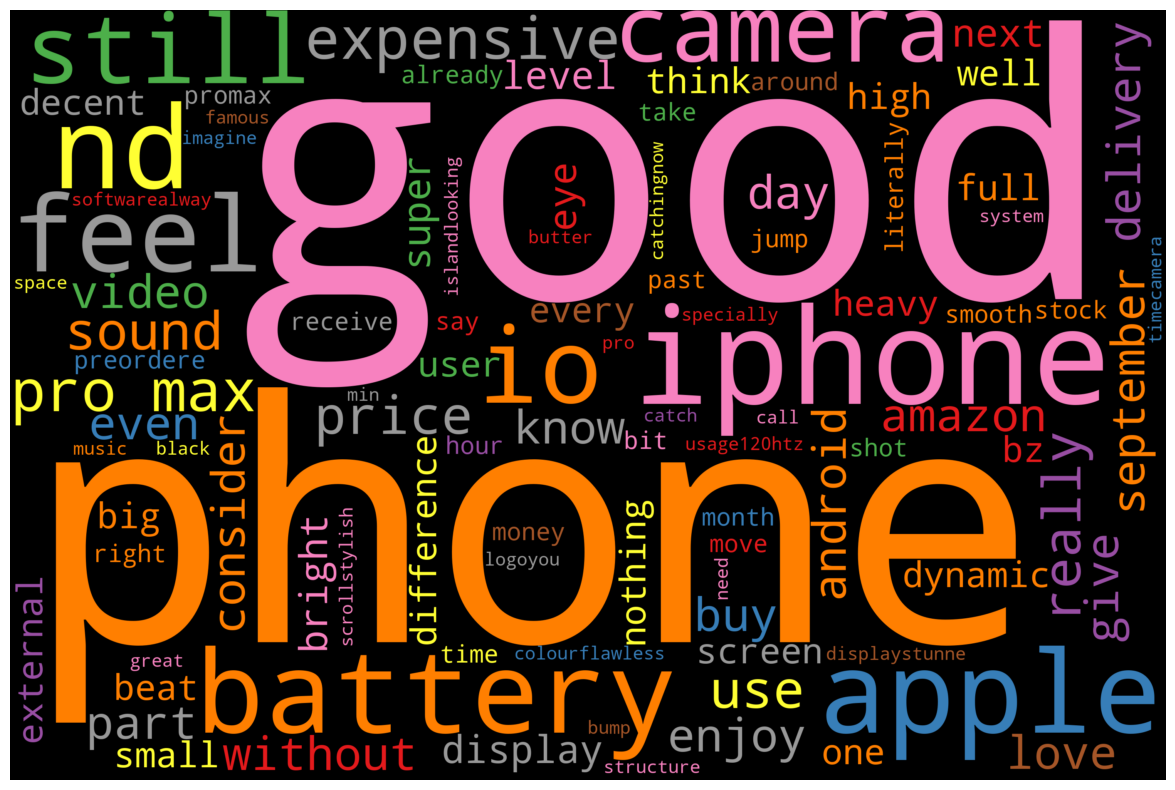

In [40]:
wordcloud = WordCloud(width=3000, height=2000, background_color='black', max_words=100,
                      colormap='Set1', stopwords=STOPWORDS).generate(clean_reviews)

# Plot the WordCloud
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [41]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [42]:
for token in doc_block[100:200]:
    print(token,token.pos_)

apple NOUN
one NUM
side NOUN
winner NOUN
every DET
departmentwe NOUN
know VERB
apple PROPN
iphone NOUN
expensive ADJ
still ADV
love VERB
bz PRON
give VERB
decent ADJ
quality NOUN
never ADV
imagaineyou ADV
know VERB
good ADJ
part NOUN
phone NOUN
camera NOUN
bz INTJ
everyone PRON
know VERB
brilliant ADJ
camera NOUN
capability NOUN
click VERB
stunning ADJ
photosthen ADP
good ADJ
part NOUN
the DET
good ADJ
part NOUN
battery NOUN
lifeif NOUN
heavy ADJ
user NOUN
get VERB
15 NUM
day NOUN
battery NOUN
easy ADJ
nd PROPN
light PROPN
user NOUN
enjoy VERB
full ADJ
2 NUM
day NOUN
without ADP
tensioncon NOUN
no DET
con NOUN
except SCONJ
price NOUN
so ADV
afford VERB
I PRON
m VERB
damm PROPN
sure ADV
love NOUN
enjoy VERB
nd PROPN
become VERB
apple NOUN
family NOUN
regular ADJ
membergo NOUN
without ADP
think NOUN
second ADJ
opinionnd NOUN
yes INTJ
amazon NOUN
delivery NOUN
always ADV
good ADJ
safe ADJ
expensive ADJ
productsthank NOUN
❤ NOUN
️ PROPN
nice ADJ
phone NOUN
there ADV
much ADJ
price NOUN
dif

In [43]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['amazon', 'get', 'screen', 'battery', 'life', 'use', 'hand', 'good', 'apple', 'beat', 'love', 'phone', 'medium', 'load', 'september', 'package', 'receive', 'today', 'use', 'iphone', 'max', 'month', 'say', 'value', 'money', 'iphone', 'buy', 'time', 'consider', 'price', 'jump', 'model', 'purchase', 'iphone', 'island', 'tbh', 'get', 'minute', 'use', 'experiment', 'design', 'pay', '40k', 'notch', 'say', 'go', 'promax', 'save', 'money', 'surprise', 'iphone', 'demand', 'year', 'plan', 'buy', 'promax', 'wait', 'month', 'stock', 'schedule', 'delivery', 'date', 'limitation', 'stock', 'receive', 'device', 'delivery', 'bit', 'delay', 'consider', 'phone', 'launchedhowever', 'phone', 'beast', 'take', 'hour', 'move', 'android', 'io', 'move', 'app', 'process', 'colour', 'spigen', 'ezfit', 'screen', 'protector', 'box', 'battery', 'backup', 'last', 'day', 'usagedisplay', 'get', 'outdoorsperformance', 'a16', 'shine', 'jump', 'a15premium', 'feel']


In [44]:
X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df = pd.DataFrame(words_freq, columns=['word', 'count']).head(10)
wd_df

,word,count
0,phone,8
1,iphone,7
2,battery,6
3,feel,5
4,camera,5
5,get,5
6,apple,4
7,use,4
8,price,4
9,sound,3


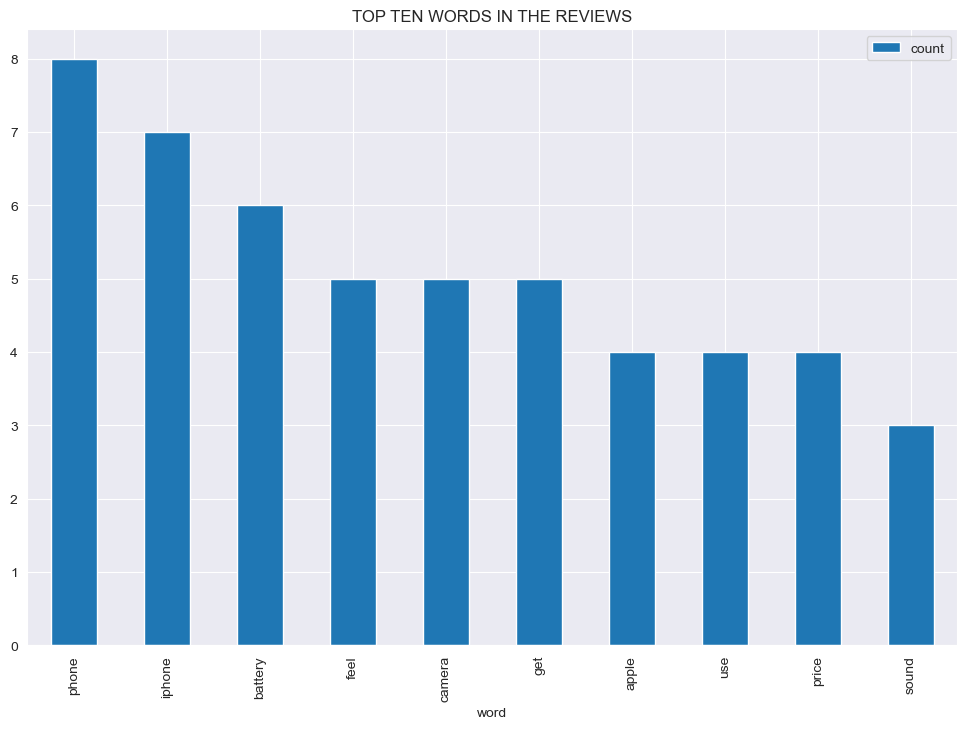

In [45]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='TOP TEN WORDS IN THE REVIEWS');

# Emotion Mining - Sentiment Analysis

In [46]:
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['Super bright next level Display.Stunning Space black colour.Flawless IOS SOFTWARE.Always on Display with min battery usage.120htz will give you feel like a butter when you scroll.Stylish nd eye catching Dynamic Island..(Looking great specially on call & music time.',
 ")Camera Bump is too High but still eye catching..Now apple camera structure is also famous like apple logo..You don't need any external sound System if you have iPhone 14 Pro Max.. Next level sound nd you can't imagine how decent it has Bass... crystal Clear sound with rich beats nd high bass...Sound is also too loud which give you feel like any external sound is added...You will enjoy UHD movies on this gorgeous LTPO SUPER RATINA XDR OLED display... Trust me..If you think S22 Ultra has more features nd good camera, then you are totally wrong..First use then you will feel that Apple is one sided winner in every department..We all know apple iPhones is very expensive but still you will love this bz they give you decent 

In [47]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Super bright next level Display.Stunning Space...
1,)Camera Bump is too High but still eye catchin...
2,So if you can afford this then I'm damm sure y...
3,Loved the phone The media could not be loaded.
4,"(Pre-ordered on 10th of September, package rec..."
5,I was already using iPhone 13 Pro Max from pas...
6,I only purchased iPhone 14 Pro Max just becaus...
7,Well definitely it’s a fresh design but is it ...
8,I would say go with 13 pro/max and save your m...
9,Also I am surprised that this iphone is so dem...


In [48]:
ls

Assignment.txt                     book.csv
Elon_musk.csv                      iphone_review.txt
Problem Statement (RS).txt         negative-words.txt
TEXT MINING  EM TWEETS.ipynb       positive-words.txt
TEXT MINING - 1.ipynb              redmi.txt
TEXT MINING - AMAZON REVIEW.ipynb  sentiment.csv
TEXT MINING-.ipynb                 stop.txt
all_words.csv


In [49]:
sentiment=pd.read_csv('all_words.csv', encoding='latin-1')

In [50]:
affinity_scores=sentiment.set_index('word')['value'].to_dict()
affinity_scores

{'faced': -2,
 'faces': -2,
 'abnormal': -1,
 'abolish': -1,
 'abominable': -1,
 'abominably': -1,
 'abominate': -1,
 'abomination': -1,
 'abort': -1,
 'aborted': -1,
 'aborts': -1,
 'abrade': -1,
 'abrasive': -1,
 'abrupt': -1,
 'abruptly': -1,
 'abscond': -1,
 'absence': -1,
 'absent-minded': -1,
 'absentee': -1,
 'absurd': -1,
 'absurdity': -1,
 'absurdly': -1,
 'absurdness': -1,
 'abuse': -1,
 'abused': -1,
 'abuses': -1,
 'abusive': -1,
 'abysmal': -1,
 'abysmally': -1,
 'abyss': -1,
 'accidental': -1,
 'accost': -1,
 'accursed': -1,
 'accusation': -1,
 'accusations': -1,
 'accuse': -2,
 'accuses': -2,
 'accusing': -2,
 'accusingly': -2,
 'acerbate': -2,
 'acerbic': -2,
 'acerbically': -2,
 'ache': -2,
 'ached': -2,
 'aches': -2,
 'achey': -2,
 'aching': -2,
 'acrid': -2,
 'acridly': -2,
 'acridness': -2,
 'acrimonious': -2,
 'acrimoniously': -1,
 'acrimony': -1,
 'adamant': -1,
 'adamantly': -1,
 'addict': -1,
 'addicted': -1,
 'addicting': -1,
 'addicts': -1,
 'admonish': -1,
 '

In [51]:

nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text.lower())  # convert text to lowercase and use Spacy's lemmatization
        sent_score = sum([sentiment_lexicon.get(word.lemma_, 0) for word in sentence if not word.is_stop])
        # use list comprehension to calculate sentiment score and exclude stopwords
    return sent_score


In [52]:
calculate_sentiment(text='abort')

-1

In [53]:
calculate_sentiment(text="desiccate")

-4

In [54]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0     17
1     57
2     28
3      5
4      0
5      2
6      0
7      5
8      0
9      0
10    -2
11    -4
12     2
13     0
14     9
15     3
16    -3
17    -5
Name: sentiment_value, dtype: int64

In [55]:
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      38
1     199
2     105
3       9
4      12
5      40
6      27
7      19
8      11
9      38
10     21
11     22
12     20
13      5
14     59
15     32
16     20
17     81
Name: word_count, dtype: int64

In [56]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
17,Every shot that you take might be one of the b...,-5,81
11,The delivery was a bit delayed considering I p...,-4,22
16,"Managed to transfer around 400 contacts, 3000 ...",-3,20
10,My scheduled delivery date was of 17th of sept...,-2,21
13,Really digging the Purple colour.,0,5
9,Also I am surprised that this iphone is so dem...,0,38
8,I would say go with 13 pro/max and save your m...,0,11
4,"(Pre-ordered on 10th of September, package rec...",0,12
6,I only purchased iPhone 14 Pro Max just becaus...,0,27
5,I was already using iPhone 13 Pro Max from pas...,2,40


In [57]:
sent_df['sentiment_value'].describe()

count    18.000000
mean      6.333333
std      14.954834
min      -5.000000
25%       0.000000
50%       1.000000
75%       5.000000
max      57.000000
Name: sentiment_value, dtype: float64

In [58]:
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
4,"(Pre-ordered on 10th of September, package rec...",0,12
6,I only purchased iPhone 14 Pro Max just becaus...,0,27
8,I would say go with 13 pro/max and save your m...,0,11
9,Also I am surprised that this iphone is so dem...,0,38
10,My scheduled delivery date was of 17th of sept...,-2,21
11,The delivery was a bit delayed considering I p...,-4,22
13,Really digging the Purple colour.,0,5
16,"Managed to transfer around 400 contacts, 3000 ...",-3,20
17,Every shot that you take might be one of the b...,-5,81


In [59]:
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,Super bright next level Display.Stunning Space...,17,38
1,)Camera Bump is too High but still eye catchin...,57,199
2,So if you can afford this then I'm damm sure y...,28,105
3,Loved the phone The media could not be loaded.,5,9
5,I was already using iPhone 13 Pro Max from pas...,2,40
7,Well definitely it’s a fresh design but is it ...,5,19
12,Took around 1.5 hours to move from Android to ...,2,20
14,Installed Spigen EZFit screen protector right ...,9,59
15,"I've had a few Pixel, OnePlus and Samsung phon...",3,32


<Axes: >

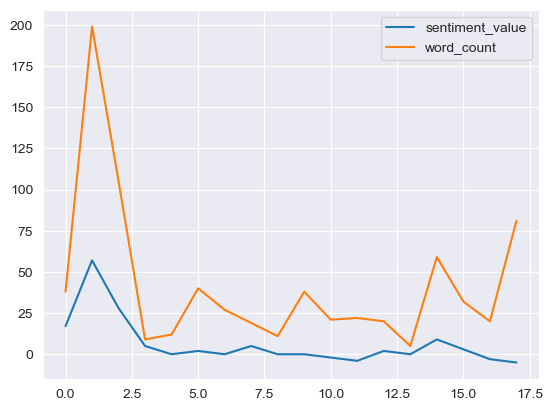

In [60]:
sent_df.plot()

In [61]:
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Super bright next level Display.Stunning Space...,17,38,0
1,)Camera Bump is too High but still eye catchin...,57,199,1
2,So if you can afford this then I'm damm sure y...,28,105,2
3,Loved the phone The media could not be loaded.,5,9,3
4,"(Pre-ordered on 10th of September, package rec...",0,12,4
5,I was already using iPhone 13 Pro Max from pas...,2,40,5
6,I only purchased iPhone 14 Pro Max just becaus...,0,27,6
7,Well definitely it’s a fresh design but is it ...,5,19,7
8,I would say go with 13 pro/max and save your m...,0,11,8
9,Also I am surprised that this iphone is so dem...,0,38,9


<Axes: xlabel='sentiment_value', ylabel='Density'>

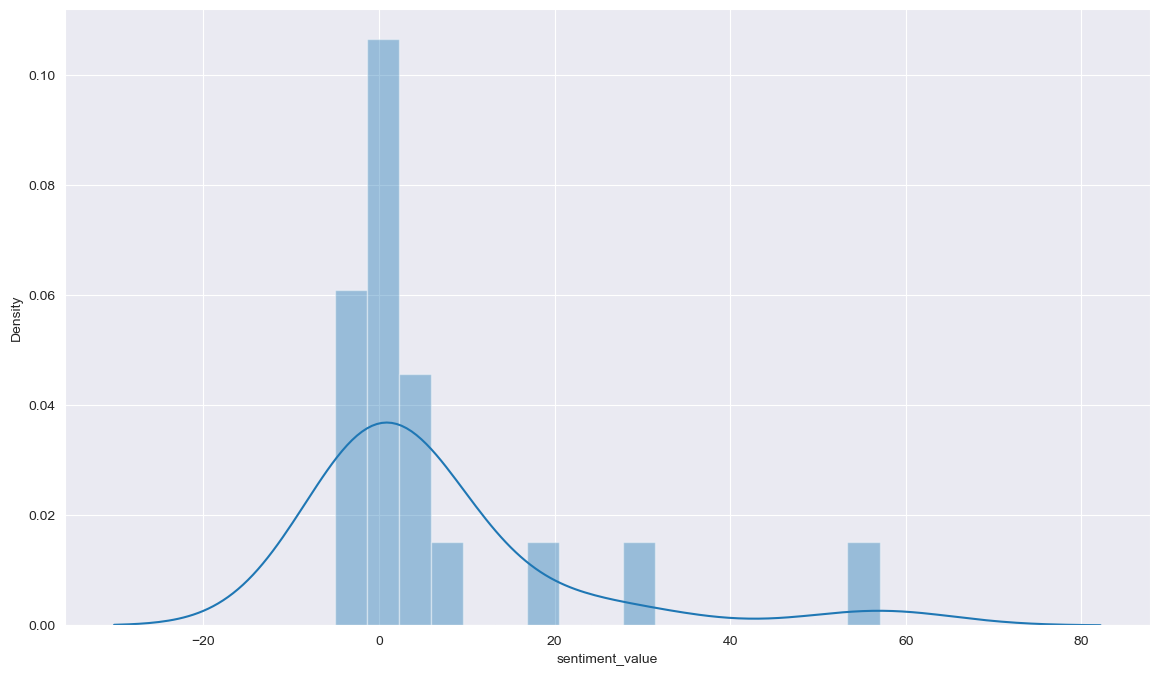

In [62]:
plt.figure(figsize=(14,8))
sns.distplot(sent_df['sentiment_value'])

<Axes: xlabel='index', ylabel='sentiment_value'>

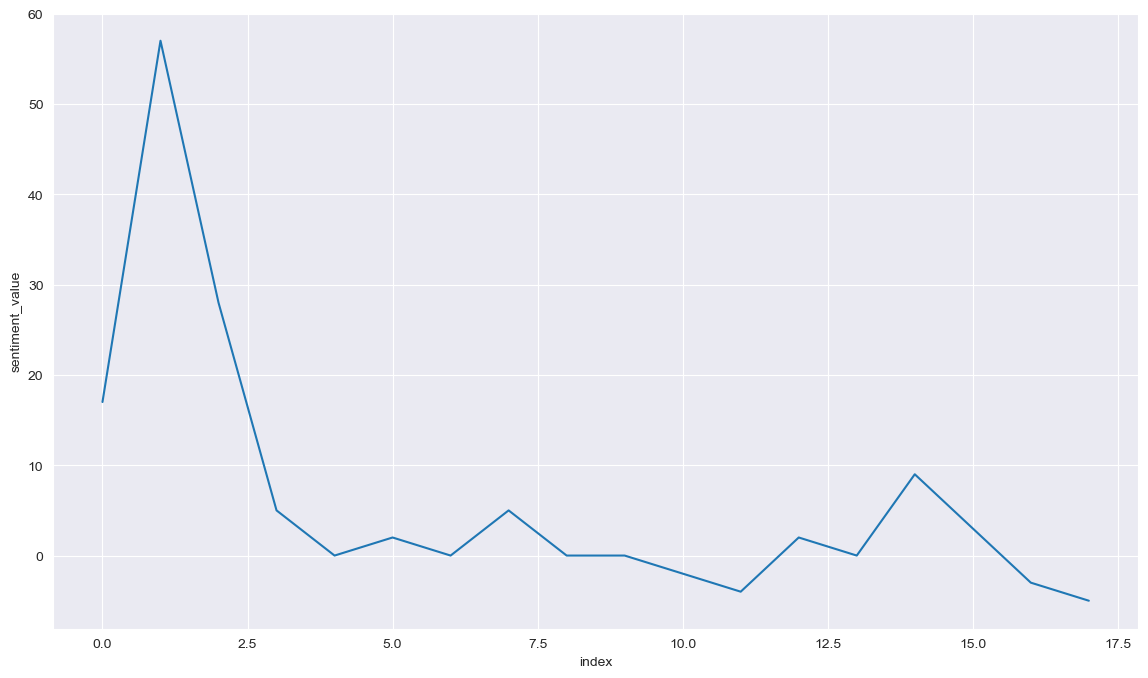

In [63]:
plt.figure(figsize=(14,8))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

Text(0, 0.5, 'Frequency')

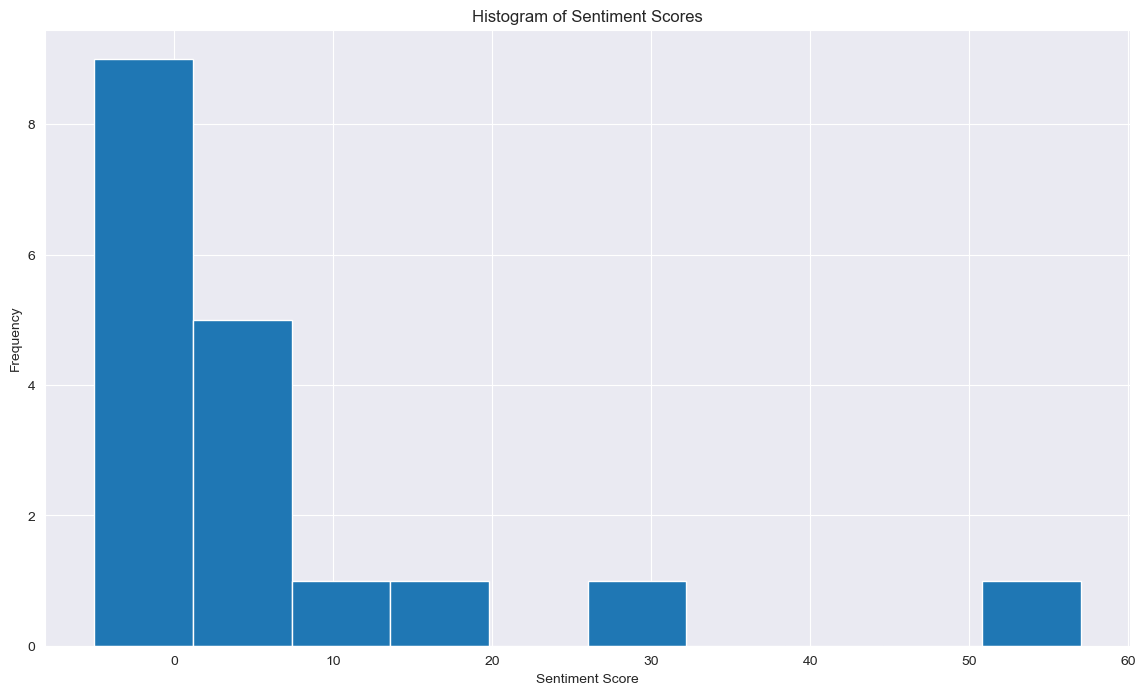

In [64]:
plt.figure(figsize=(14,8))
plt.hist(sent_df['sentiment_value'], bins=10)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')

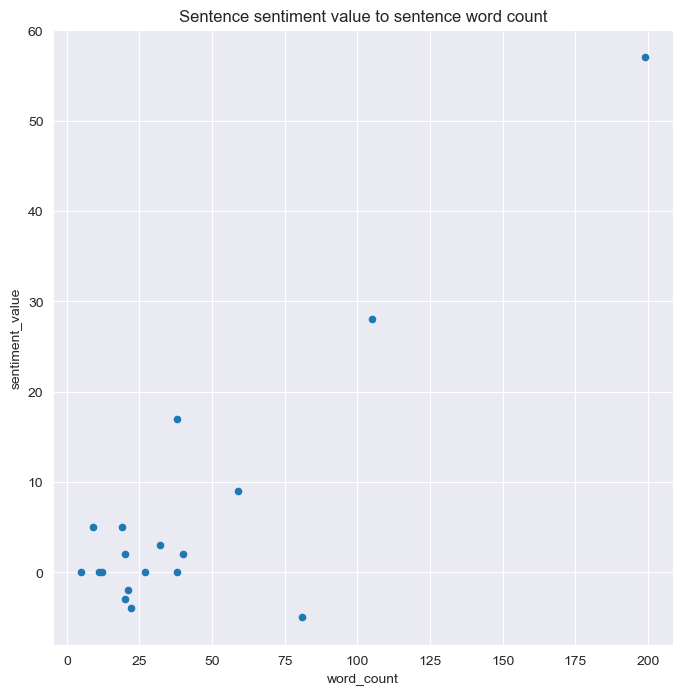

In [65]:
import matplotlib.pyplot as plt

# Set default figure size
plt.rcParams['figure.figsize'] = [8, 8]

# Scatter plot of sentence sentiment value vs sentence word count
sent_df.plot.scatter(x='word_count', y='sentiment_value', title='Sentence sentiment value to sentence word count')
plt.show()


Text(23.125000000000014, 0.5, 'Sentiment Value')

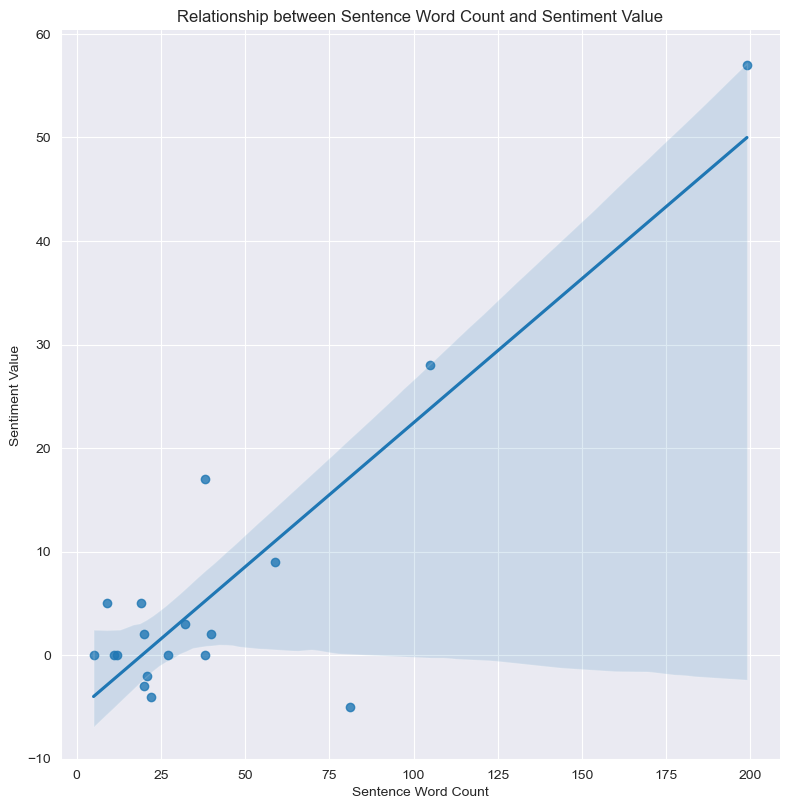

In [66]:
#a scatter plot with a regression line that shows the relationship between sentence word count and sentiment value.

sns.lmplot(x='word_count', y='sentiment_value', data=sent_df, height=8)
plt.title('Relationship between Sentence Word Count and Sentiment Value')
plt.xlabel('Sentence Word Count')
plt.ylabel('Sentiment Value')


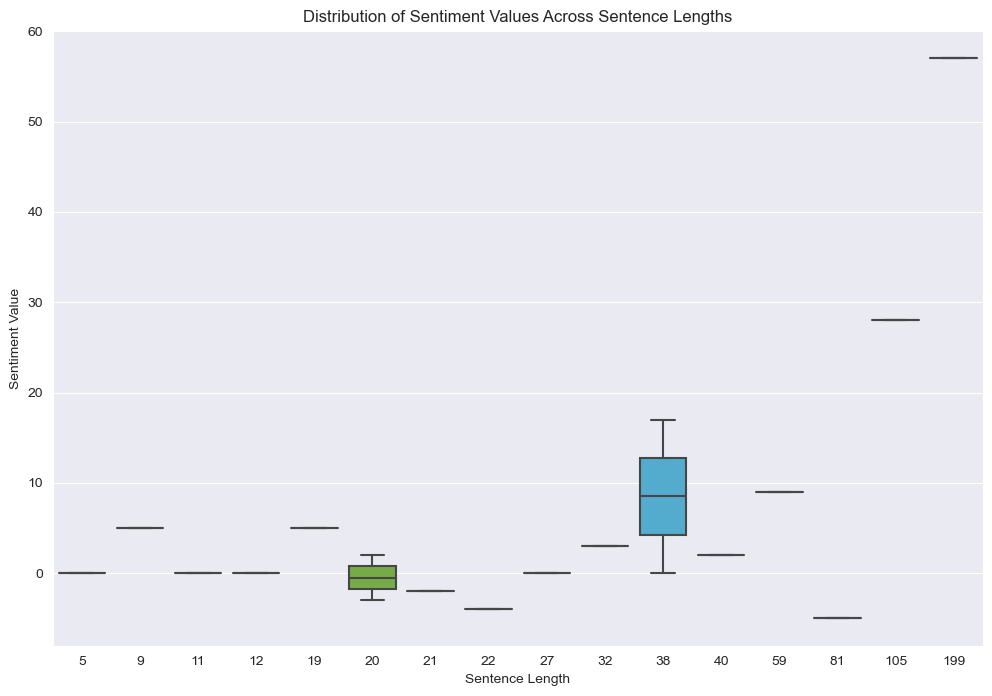

In [67]:
#This plot can help visualize if there's any correlation between sentence length and sentiment value
sent_df['sentence_length'] = sent_df['sentence'].apply(lambda x: len(x.split()))
plt.figure(figsize=(12, 8))
sns.boxplot(x='sentence_length', y='sentiment_value', data=sent_df)
plt.title('Distribution of Sentiment Values Across Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Sentiment Value')
plt.show()


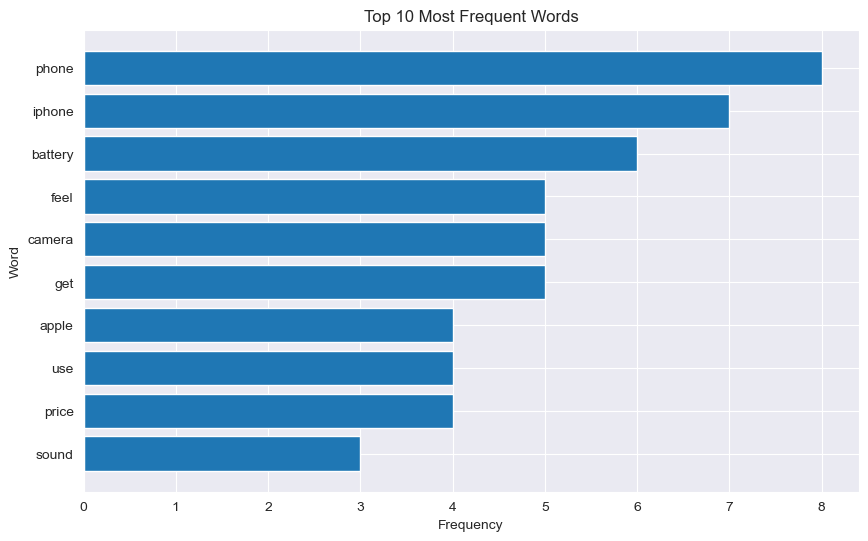

In [68]:
#This code generates a horizontal bar chart showing the top 10 most frequent words in the text,

freq_df = wd_df.nlargest(10, 'count')
plt.figure(figsize=(10, 6))
plt.barh(freq_df['word'], freq_df['count'])
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.gca().invert_yaxis()
plt.show()


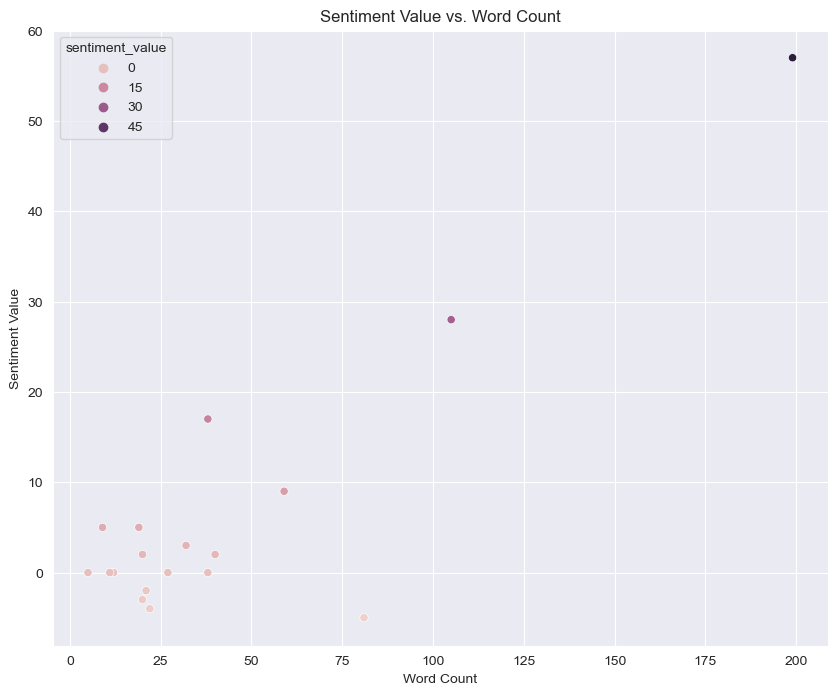

In [69]:
#plot gives a visual representation of the relationship between sentence length and sentiment.

sns.set_style('darkgrid')
sns.set_palette('husl')

plt.figure(figsize=(10, 8))
sns.scatterplot(x='word_count', y='sentiment_value', hue='sentiment_value', data=sent_df)
plt.title('Sentiment Value vs. Word Count')
plt.xlabel('Word Count')
plt.ylabel('Sentiment Value')
plt.show()
